In [1]:
import pandas as pd
import numpy as np

file_path = "Acetone_ML_F.xlsx"

acetone_data = pd.ExcelFile(file_path)
sheet_names = acetone_data.sheet_names

dfs = []

for sheet in sheet_names:
    acetone_data = pd.read_excel(file_path, sheet_name=sheet)  
    acetone_data['Dye_Name'] = sheet  
    dfs.append(acetone_data)  


merged_df = pd.concat(dfs, ignore_index=True)


merged_df.to_excel("merged_acetone.xlsx", index=False)


merged_df.head()


,R,G,B,ppm,Dye_Name
0,6.137000,3.430000,0.910000,10,Methyl red
1,4.680000,5.154000,2.511000,10,Methyl red
2,7.684000,4.940000,1.440000,10,Methyl red
3,6.372500,3.715666,1.096991,10,Methyl red
4,4.921418,5.466635,2.628103,10,Methyl red


In [3]:
myfile ='merged_acetone.xlsx'

In [5]:
data= pd.read_excel(myfile)

In [7]:
data.head()

,R,G,B,ppm,Dye_Name
0,6.137000,3.430000,0.910000,10,Methyl red
1,4.680000,5.154000,2.511000,10,Methyl red
2,7.684000,4.940000,1.440000,10,Methyl red
3,6.372500,3.715666,1.096991,10,Methyl red
4,4.921418,5.466635,2.628103,10,Methyl red


In [9]:
data.rename(columns={
    'R': 'Delta_R',
    'G': 'Delta_G',
    'B': 'Delta_B',
    'ppm': 'Concentration_ppm'
}, inplace=True)

In [11]:
data.head()

,Delta_R,Delta_G,Delta_B,Concentration_ppm,Dye_Name
0,6.137000,3.430000,0.910000,10,Methyl red
1,4.680000,5.154000,2.511000,10,Methyl red
2,7.684000,4.940000,1.440000,10,Methyl red
3,6.372500,3.715666,1.096991,10,Methyl red
4,4.921418,5.466635,2.628103,10,Methyl red


In [13]:
myfile2 = "Initial RGB.xlsx"

In [15]:
rgb=pd.read_excel(myfile2)

In [17]:
rgb.head()

,Dye name,Methyl red,Bromocresol purple,Chlorophenol red,Bromocresol green,Bromophenol blue,Methyl orange,Metanil yellow,Crystal violet,Indigo carmine,...,Thymol blue,Neutral red,Pyrocatechol violet,m-cresol purple,Congo red,Alizarin,Acridine orange,Methyl thymol blue,Nitrazine yellow,Phenol red
0,initial R,174.937,101.317,45.717,14.814,30.328,189.720,192.389,38.834,180.446,...,189.360,88.934,170.812,182.983,192.407,75.013,192.651,185.910,159.760,201.617
1,initia G,36.525,122.143,35.687,56.779,33.692,171.744,157.623,17.696,185.901,...,175.483,37.199,122.533,190.580,139.647,49.001,156.387,82.779,139.476,160.347
2,initia B,9.558,27.849,28.429,63.313,87.031,4.143,0.241,121.416,149.267,...,27.923,15.694,5.645,118.825,137.021,33.795,0.456,7.605,19.188,14.785


In [19]:
mainrgb=rgb.T

In [21]:
mainrgb=mainrgb.reset_index()
mainrgb.columns=mainrgb.iloc[0]
mainrgb= mainrgb[1:]
mainrgb.head()

,Dye name,initial R,initia G,initia B
1,Methyl red,174.937,36.525,9.558
2,Bromocresol purple,101.317,122.143,27.849
3,Chlorophenol red,45.717,35.687,28.429
4,Bromocresol green,14.814,56.779,63.313
5,Bromophenol blue,30.328,33.692,87.031


In [23]:
mainrgb.columns=["Dye_Name","Ro","Go","Bo"]

In [25]:
mainrgb.head()

,Dye_Name,Ro,Go,Bo
1,Methyl red,174.937,36.525,9.558
2,Bromocresol purple,101.317,122.143,27.849
3,Chlorophenol red,45.717,35.687,28.429
4,Bromocresol green,14.814,56.779,63.313
5,Bromophenol blue,30.328,33.692,87.031


In [27]:
newdata=pd.merge(data,mainrgb,on="Dye_Name",how="left")

In [29]:
newdata.head()

,Delta_R,Delta_G,Delta_B,Concentration_ppm,Dye_Name,Ro,Go,Bo
0,6.137000,3.430000,0.910000,10,Methyl red,174.937,36.525,9.558
1,4.680000,5.154000,2.511000,10,Methyl red,174.937,36.525,9.558
2,7.684000,4.940000,1.440000,10,Methyl red,174.937,36.525,9.558
3,6.372500,3.715666,1.096991,10,Methyl red,174.937,36.525,9.558
4,4.921418,5.466635,2.628103,10,Methyl red,174.937,36.525,9.558


In [31]:
nan_rows = newdata[newdata.isna().any(axis=1)]

# Displaying the rows with NaN
print(nan_rows)

Empty DataFrame
Columns: [Delta_R, Delta_G, Delta_B, Concentration_ppm, Dye_Name, Ro, Go, Bo]
Index: []


In [33]:
contains_nan = newdata.isna().any().any()

# Displaying the result
if contains_nan:
    print("The DataFrame contains NaN values.")
else:
    print("The DataFrame does not contain NaN values.")

The DataFrame does not contain NaN values.


In [35]:
newdata.head()

,Delta_R,Delta_G,Delta_B,Concentration_ppm,Dye_Name,Ro,Go,Bo
0,6.137000,3.430000,0.910000,10,Methyl red,174.937,36.525,9.558
1,4.680000,5.154000,2.511000,10,Methyl red,174.937,36.525,9.558
2,7.684000,4.940000,1.440000,10,Methyl red,174.937,36.525,9.558
3,6.372500,3.715666,1.096991,10,Methyl red,174.937,36.525,9.558
4,4.921418,5.466635,2.628103,10,Methyl red,174.937,36.525,9.558


In [37]:
#Term new sensitivity is used as sensitivity was just sqrt(delta_R^2 + delta_G^2 + delta_B^2) whereas new sensitivity is different
newdata['New Sensitivity'] = ((newdata["Delta_R"]+newdata["Delta_G"]+newdata["Delta_B"])/(newdata["Ro"]+ newdata["Go"]+ newdata["Bo"]))*100

In [39]:
newdata.head()

,Delta_R,Delta_G,Delta_B,Concentration_ppm,Dye_Name,Ro,Go,Bo,New Sensitivity
0,6.137000,3.430000,0.910000,10,Methyl red,174.937,36.525,9.558,4.740295
1,4.680000,5.154000,2.511000,10,Methyl red,174.937,36.525,9.558,5.585467
2,7.684000,4.940000,1.440000,10,Methyl red,174.937,36.525,9.558,6.363225
3,6.372500,3.715666,1.096991,10,Methyl red,174.937,36.525,9.558,5.060699
4,4.921418,5.466635,2.628103,10,Methyl red,174.937,36.525,9.558,5.88913


In [41]:
dye_sensitivity = newdata.groupby(['Dye_Name'])['New Sensitivity'].mean().reset_index()
dye_sensitivity = dye_sensitivity.sort_values(by='New Sensitivity', ascending=False)

# Displaying top 5 dyes
top_5_dyes = dye_sensitivity.head(5)
print(top_5_dyes)

               Dye_Name New Sensitivity
3     Bromocresol green       27.198191
5      Bromophenol blue       25.646826
21  Pyrocatechol violet       24.523287
7      Chlorophenol red        20.05446
4    Bromocresol purple       17.624059


In [43]:
null_rows = newdata[newdata['New Sensitivity'].isna()]

print(null_rows)

Empty DataFrame
Columns: [Delta_R, Delta_G, Delta_B, Concentration_ppm, Dye_Name, Ro, Go, Bo, New Sensitivity]
Index: []


In [45]:
print(newdata['New Sensitivity'].dtype)

object


In [47]:
newdata['New Sensitivity'] = pd.to_numeric(newdata['New Sensitivity'], errors='coerce')

In [49]:
null_rows = newdata[newdata['New Sensitivity'].isna()]

print(null_rows)

Empty DataFrame
Columns: [Delta_R, Delta_G, Delta_B, Concentration_ppm, Dye_Name, Ro, Go, Bo, New Sensitivity]
Index: []


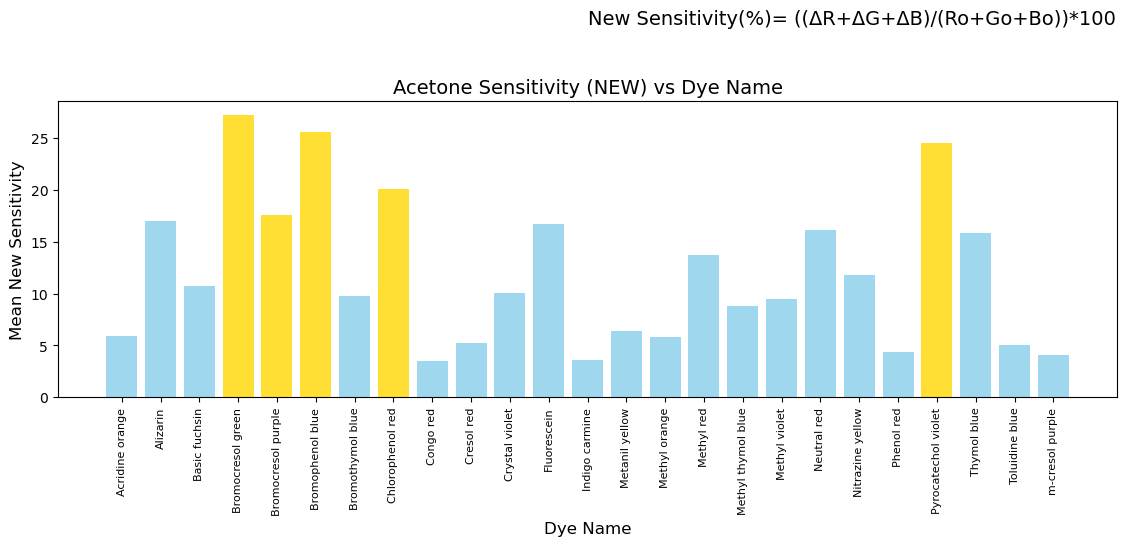

In [51]:
import matplotlib.pyplot as plt

# Calculating mean sensitivity for each dye
new_sensitivity_plot_data = newdata.groupby('Dye_Name')['New Sensitivity'].mean().reset_index()

# Sorting by Dye_Name alphabetically for consistent plotting
new_sensitivity_plot_data.sort_values(by='Dye_Name', inplace=True)

top_5_dyes = new_sensitivity_plot_data.nlargest(5, 'New Sensitivity')

colors = ['gold' if dye in top_5_dyes['Dye_Name'].values else 'skyblue' for dye in new_sensitivity_plot_data['Dye_Name']]

plt.figure(figsize=(12, 6))
plt.text(12, 36, "New Sensitivity(%)= ((ΔR+ΔG+ΔB)/(Ro+Go+Bo))*100", fontsize=14, color='black')
plt.bar(new_sensitivity_plot_data['Dye_Name'], new_sensitivity_plot_data['New Sensitivity'], color=colors, alpha=0.8)
plt.xlabel('Dye Name', fontsize=12)
plt.ylabel('Mean New Sensitivity', fontsize=12)
plt.title('Acetone Sensitivity (NEW) vs Dye Name', fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

In [53]:
# List of top 5 dyes
top_5_dyes = ['Bromocresol green', 'Bromophenol blue','Pyrocatechol violet','Chlorophenol red','Bromocresol purple']

# Filtering data for these dyes
filtered_data = newdata[newdata['Dye_Name'].isin(top_5_dyes)]

In [55]:
# Checking the filtered data
print(filtered_data['Dye_Name'].value_counts())

Dye_Name
Bromocresol purple     140
Chlorophenol red       140
Bromocresol green      140
Bromophenol blue       140
Pyrocatechol violet    140
Name: count, dtype: int64


In [57]:
# Creating a dictionary to store individual datasets
dye_data = {dye: filtered_data[filtered_data['Dye_Name'] == dye] for dye in top_5_dyes}

# Verifying the separation
for dye, df in dye_data.items():
    print(f"{dye}: {df.shape[0]} rows")

Bromocresol green: 140 rows
Bromophenol blue: 140 rows
Pyrocatechol violet: 140 rows
Chlorophenol red: 140 rows
Bromocresol purple: 140 rows


In [59]:
for dye, df in dye_data.items():
    file_name = f"{dye.replace(' ', '_')}_data.xlsx"
    df.to_excel(file_name, index=False)
    print(f"Saved {dye} data to {file_name}")

Saved Bromocresol green data to Bromocresol_green_data.xlsx
Saved Bromophenol blue data to Bromophenol_blue_data.xlsx
Saved Pyrocatechol violet data to Pyrocatechol_violet_data.xlsx
Saved Chlorophenol red data to Chlorophenol_red_data.xlsx
Saved Bromocresol purple data to Bromocresol_purple_data.xlsx
